# Appending Census and Looking Forward - 16-07-19

This notebook appends imports, creates and appends the relavant independent variables featues to complete the main data frame. Take care to lable columns correctly based on **percentage or actual values**.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import folium 
import matplotlib
import matplotlib.pyplot as plt

from scipy import stats
#Display charts in the notebook
%matplotlib inline

#SciKit Learn a python ML Library
from sklearn.preprocessing import StandardScaler, Imputer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
#import the previous made main df
master_df = pd.read_csv("master_df.csv")
master_df.head()

,STCOU,Area_name,patent_output,grad_pat_output,total_cited_by,mean_cit_pp,pctle_citedby,total_pop,pop_psqm,pct_2races
0,6085,"Santa Clara, CA",13755,-19.178571,28775,2.091967,5.0,1781642.0,1381.0,4.9
1,6037,"Los Angeles, CA",5907,2.202381,10176,1.722702,4.0,9818605.0,2419.6,4.5
2,6073,"San Diego, CA",5445,6.607143,9663,1.774656,4.0,3095313.0,735.8,5.1
3,53033,"King, WA",4325,10.011905,9820,2.270520,6.0,1931249.0,912.9,5.0
4,6059,"Orange, CA",4007,1.750000,9045,2.257300,5.0,3010232.0,3807.7,4.2


In [3]:
census_dump_df = pd.read_csv("census_dump_2.csv")
census_dump_df.head()

,Area_name,STCOU,AGE320210D,AGE380210D,AGE470210D,EDU695209D,HSG655209D,HSG660209D,INC340209D,INC350209D,LND010200D
0,UNITED STATES,0,21585999,41063948,41070606,19980460,51267052,24053370,4724616,4544384,3794083.06
1,ALABAMA,1000,335322,608922,619501,238355,780996,506436,46035,39992,52419.02
2,"Autauga, AL",1001,3080,6487,8243,2285,9211,4971,605,256,604.45
3,"Baldwin, AL",1003,9449,20956,23553,10855,32360,20696,2201,2137,2026.93
4,"Barbour, AL",1005,1794,3818,3628,1048,3426,3653,155,83,904.52


# Age
Number of people 25< aged <40. Sum the totals then most likely convert to percentage.

- AGE320210D: Resident population 20 to 24 years (April 1 - complete count) 2010
- AGE380210D: Resident population 25 to 34 years (April 1 - complete count) 2010
- AGE470210D: Resident population 35 to 44 years (April 1 - complete count) 2010

Will sum these columns to get the total working age population per county therefore working age is defined as the population between 20-44 in this measure.

In [4]:
census_dump_df['working_age'] = census_dump_df['AGE320210D'] + census_dump_df['AGE380210D'] +census_dump_df['AGE470210D']
census_dump_df.head()

,Area_name,STCOU,AGE320210D,AGE380210D,AGE470210D,EDU695209D,HSG655209D,HSG660209D,INC340209D,INC350209D,LND010200D,working_age
0,UNITED STATES,0,21585999,41063948,41070606,19980460,51267052,24053370,4724616,4544384,3794083.06,103720553
1,ALABAMA,1000,335322,608922,619501,238355,780996,506436,46035,39992,52419.02,1563745
2,"Autauga, AL",1001,3080,6487,8243,2285,9211,4971,605,256,604.45,17810
3,"Baldwin, AL",1003,9449,20956,23553,10855,32360,20696,2201,2137,2026.93,53958
4,"Barbour, AL",1005,1794,3818,3628,1048,3426,3653,155,83,904.52,9240


# Education:
The number of people aged 25 and over with a graduate degree or professional qualification. This metric is imported straight from the census. Only needs renaming.

- EDU695209D	Educational attainment - persons 25 years and over - graduate or professional degree 2005-2009

In [5]:
census_dump_df.rename(columns={'EDU695209D': 'high_education'}, inplace=True)

census_dump_df.head()

,Area_name,STCOU,AGE320210D,AGE380210D,AGE470210D,high_education,HSG655209D,HSG660209D,INC340209D,INC350209D,LND010200D,working_age
0,UNITED STATES,0,21585999,41063948,41070606,19980460,51267052,24053370,4724616,4544384,3794083.06,103720553
1,ALABAMA,1000,335322,608922,619501,238355,780996,506436,46035,39992,52419.02,1563745
2,"Autauga, AL",1001,3080,6487,8243,2285,9211,4971,605,256,604.45,17810
3,"Baldwin, AL",1003,9449,20956,23553,10855,32360,20696,2201,2137,2026.93,53958
4,"Barbour, AL",1005,1794,3818,3628,1048,3426,3653,155,83,904.52,9240


# Mortgage: 
Count the number of people living in mortgaed houses, we could compare this against the number with paid off mortgages, get a ratio. For now it is just the number of people with a mortgage.

- HSG655209D	Mortgage status - owner-occupied units, housing units with a mortgage 2005-2009
- HSG660209D	Mortgage status - owner-occupied units, housing units without a mortgage 2005-2009

In [6]:
census_dump_df.rename(columns={'HSG655209D': 'mortgaged'}, inplace=True)
census_dump_df.head()

,Area_name,STCOU,AGE320210D,AGE380210D,AGE470210D,high_education,mortgaged,HSG660209D,INC340209D,INC350209D,LND010200D,working_age
0,UNITED STATES,0,21585999,41063948,41070606,19980460,51267052,24053370,4724616,4544384,3794083.06,103720553
1,ALABAMA,1000,335322,608922,619501,238355,780996,506436,46035,39992,52419.02,1563745
2,"Autauga, AL",1001,3080,6487,8243,2285,9211,4971,605,256,604.45,17810
3,"Baldwin, AL",1003,9449,20956,23553,10855,32360,20696,2201,2137,2026.93,53958
4,"Barbour, AL",1005,1794,3818,3628,1048,3426,3653,155,83,904.52,9240


# Wealth
Find the number of top earners, this is made by counting the number of people earning \\$150,000 or more

- INC340209D	Households with income in the past 12 months (in 2009 inflation-adjusted dollars) of \\$150,000 to \\$199,999 in 2005-2009
- INC350209D	Households with income in the past 12 months (in 2009 inflation-adjusted dollars) of \\$200,000 or more in 2005-2009

In [7]:
census_dump_df['high_earners'] = census_dump_df['INC340209D'] + census_dump_df['INC350209D']
census_dump_df.head()

,Area_name,STCOU,AGE320210D,AGE380210D,AGE470210D,high_education,mortgaged,HSG660209D,INC340209D,INC350209D,LND010200D,working_age,high_earners
0,UNITED STATES,0,21585999,41063948,41070606,19980460,51267052,24053370,4724616,4544384,3794083.06,103720553,9269000
1,ALABAMA,1000,335322,608922,619501,238355,780996,506436,46035,39992,52419.02,1563745,86027
2,"Autauga, AL",1001,3080,6487,8243,2285,9211,4971,605,256,604.45,17810,861
3,"Baldwin, AL",1003,9449,20956,23553,10855,32360,20696,2201,2137,2026.93,53958,4338
4,"Barbour, AL",1005,1794,3818,3628,1048,3426,3653,155,83,904.52,9240,238


# Area in square miles
Using this as a normalising factor
- LND010200D	Total area in square miles

In [8]:
census_dump_df.rename(columns={'LND010200D': 'area_sqm'}, inplace=True)
census_dump_df.head()

,Area_name,STCOU,AGE320210D,AGE380210D,AGE470210D,high_education,mortgaged,HSG660209D,INC340209D,INC350209D,area_sqm,working_age,high_earners
0,UNITED STATES,0,21585999,41063948,41070606,19980460,51267052,24053370,4724616,4544384,3794083.06,103720553,9269000
1,ALABAMA,1000,335322,608922,619501,238355,780996,506436,46035,39992,52419.02,1563745,86027
2,"Autauga, AL",1001,3080,6487,8243,2285,9211,4971,605,256,604.45,17810,861
3,"Baldwin, AL",1003,9449,20956,23553,10855,32360,20696,2201,2137,2026.93,53958,4338
4,"Barbour, AL",1005,1794,3818,3628,1048,3426,3653,155,83,904.52,9240,238


# Merging data and correlations
Now merge the new census data onto the main census dataframe and order columns

In [9]:
to_merge_census_df = census_dump_df[['STCOU','high_education', 'mortgaged', 'area_sqm', 'working_age', 'high_earners']]
master_df = pd.merge(master_df, to_merge_census_df, how='left', left_on = 'STCOU', right_on = 'STCOU')
print(master_df.shape)
master_df.head()

(2382, 15)


,STCOU,Area_name,patent_output,grad_pat_output,total_cited_by,mean_cit_pp,pctle_citedby,total_pop,pop_psqm,pct_2races,high_education,mortgaged,area_sqm,working_age,high_earners
0,6085,"Santa Clara, CA",13755,-19.178571,28775,2.091967,5.0,1781642.0,1381.0,4.9,215568.0,270364.0,1304.01,661052.0,136873.0
1,6037,"Los Angeles, CA",5907,2.202381,10176,1.722702,4.0,9818605.0,2419.6,4.5,608186.0,1196174.0,4752.32,3658845.0,354019.0
2,6073,"San Diego, CA",5445,6.607143,9663,1.774656,4.0,3095313.0,735.8,5.1,244099.0,458225.0,4525.52,1162235.0,133057.0
3,53033,"King, WA",4325,10.011905,9820,2.270520,6.0,1931249.0,912.9,5.0,208097.0,361750.0,2306.53,739329.0,107496.0
4,6059,"Orange, CA",4007,1.750000,9045,2.257300,5.0,3010232.0,3807.7,4.2,237180.0,464666.0,947.98,1066172.0,168995.0


In [10]:
master_df = master_df[['STCOU', 'Area_name', 'patent_output', 'grad_pat_output',
                       'total_cited_by', 'mean_cit_pp', 'pctle_citedby',
                       'total_pop', 'pop_psqm', 'area_sqm',
                       'pct_2races', 'high_education', 'mortgaged', 'working_age', 'high_earners']]

# master_df.to_csv ('master_df_w_census.csv', header=True, index=False)

In [11]:
#SomeOOP, has multiple functions displaying the methods we would like to use
class CorrelationAnalysis:
    '''This class provides correlation information for dataframe objects
    type(df) = dataframe
    type(name) = string'''
    
    def __init__(self, df, name):
        self.__df = df
        self.__name = name
        
    def corrmatOutput(self):
        '''Correlation Matrix Heatmap'''
        df = self.__df
        self.corrmat = df.corr(method ='spearman')
        f, ax = plt.subplots(figsize=(12, 9))
        sns.heatmap(self.corrmat, vmax=.8, square=True,cmap="YlGnBu");
        plt.title(f'Correlation Matrix For {self.__name}')
    
    def topCorrelated(self, num):
        '''Prints the highest correlated pairs
        type(num) =  int'''
        s = self.corrmat.unstack()
        so = s.sort_values(kind="quicksort", ascending=False).drop_duplicates()
        print(so.nlargest(num))
    
    def plotCorrelation(self, x_axis, y_axis):
        '''Produces a joint plot for two columns
        type(x_axis, y_axis) + str'''
        sns.jointplot(x=self.__df[f'{x_axis}'], y=self.__df[f'{y_axis}'], kind='reg')

## Unormalised

Now we create correlation matrix, unormalised first (without dividing by total population)

In [12]:
unorm_corr_df = master_df[['patent_output', 'grad_pat_output', 
                           'total_cited_by', 'mean_cit_pp', 'pctle_citedby', 
                           'total_pop', 'area_sqm',
                          'high_education', 'mortgaged', 'working_age', 'high_earners']]

high_earners    high_earners      1.000000
working_age     total_pop         0.995327
total_pop       mortgaged         0.985494
working_age     mortgaged         0.974136
high_education  high_earners      0.963114
                mortgaged         0.961231
                total_pop         0.960349
working_age     high_education    0.955134
high_earners    mortgaged         0.952135
                total_pop         0.943935
working_age     high_earners      0.935913
pctle_citedby   mean_cit_pp       0.921372
total_cited_by  patent_output     0.878030
                pctle_citedby     0.840636
patent_output   high_earners      0.806685
high_education  patent_output     0.793339
patent_output   mortgaged         0.785573
total_pop       patent_output     0.769746
working_age     patent_output     0.763556
mean_cit_pp     total_cited_by    0.745770
total_cited_by  high_earners      0.703913
                high_education    0.695595
                mortgaged         0.689799
           

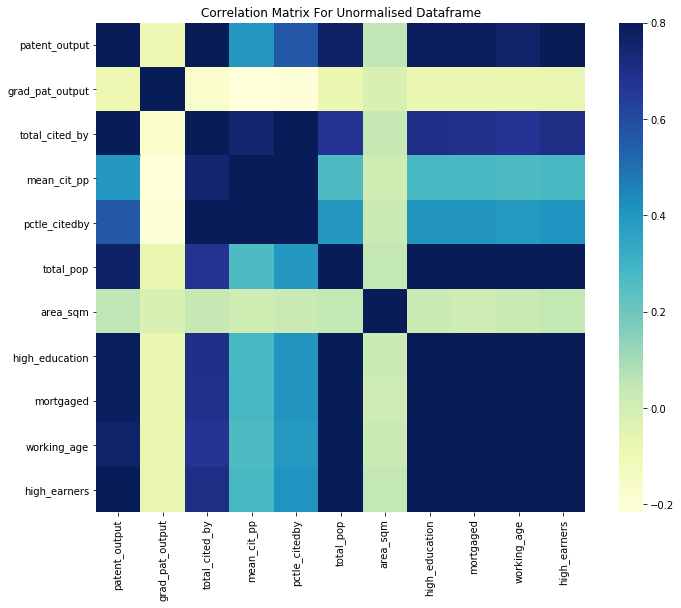

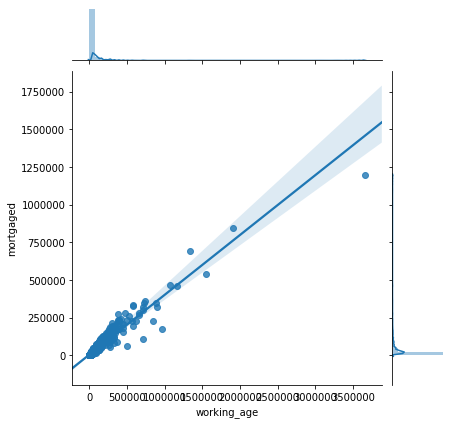

In [13]:
corr_unorm = CorrelationAnalysis(unorm_corr_df, "Unormalised Dataframe")
corr_unorm.corrmatOutput()
corr_unorm.topCorrelated(25)
corr_unorm.plotCorrelation('working_age', 'mortgaged')

## Normalised
Now the correlations are normalised by the total population

In [14]:
#Create a copy of the data frame to normalise the independent variables
norm_corr_df =  master_df[['patent_output', 'grad_pat_output', 
                           'total_cited_by', 'mean_cit_pp', 'pctle_citedby', 
                           'total_pop', 'area_sqm',
                           'high_education', 'mortgaged', 'working_age', 'high_earners']]

#perfrom the normalisation
#patent ouput div by the population
norm_corr_df['patent_output_pp'] = (norm_corr_df['patent_output']/norm_corr_df['total_pop']) 

#div by population and x100 to see percentage
norm_corr_df['pct_high_education'] = (norm_corr_df['high_education']/norm_corr_df['total_pop'])*100
norm_corr_df['pct_mortgaged'] = (norm_corr_df['mortgaged']/norm_corr_df['total_pop'])*100
norm_corr_df['pct_working_age'] = (norm_corr_df['working_age']/norm_corr_df['total_pop'])*100
norm_corr_df['pct_high_earners'] = (norm_corr_df['high_earners']/norm_corr_df['total_pop'])*100

#drop the unormalised columns
norm_corr_df.drop(['high_education', 'mortgaged', 
                'working_age', 'high_earners'], axis=1, inplace=True)

/Users/yusufsohoye/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/yusufsohoye/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/Users/yusufsohoye/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

pct_high_earners    pct_high_earners    1.000000
mean_cit_pp         pctle_citedby       0.921372
total_cited_by      patent_output       0.878030
pctle_citedby       total_cited_by      0.840636
patent_output       total_pop           0.769746
total_cited_by      mean_cit_pp         0.745770
pct_high_education  pct_high_earners    0.687153
total_pop           total_cited_by      0.675529
patent_output       patent_output_pp    0.655768
pct_high_earners    patent_output       0.612035
total_cited_by      patent_output_pp    0.598034
pct_high_education  patent_output       0.572028
pctle_citedby       patent_output       0.564790
total_pop           pct_working_age     0.564617
total_cited_by      pct_high_earners    0.537192
pct_high_education  total_pop           0.510611
pct_high_earners    total_pop           0.510089
pct_high_education  total_cited_by      0.508236
pct_mortgaged       pct_high_earners    0.432209
pct_high_earners    patent_output_pp    0.425566
pctle_citedby       

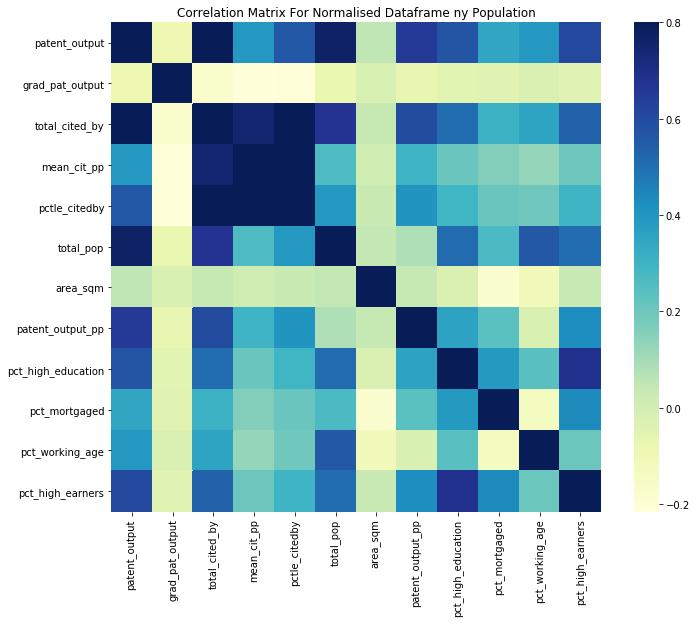

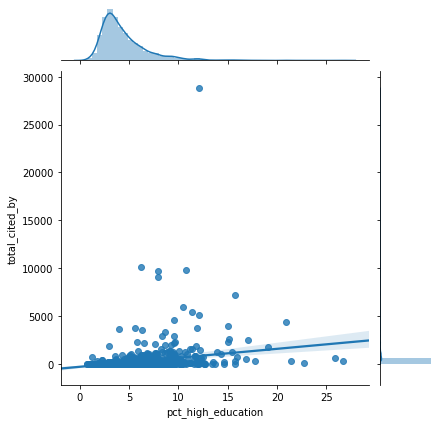

In [15]:
corr_pop_norm = CorrelationAnalysis(norm_corr_df, "Normalised Dataframe ny Population")
corr_pop_norm.corrmatOutput()
corr_pop_norm.topCorrelated(25)
corr_pop_norm.plotCorrelation('pct_high_education', 'total_cited_by')

# Regression Analysis

As we have multiple potential dependent vairables, we must define the one we will use first. This way the code can be repeated with alternate variables. First we set up our numpy arrays of target (y) and features (X).

In [16]:
norm_corr_df.head()

,patent_output,grad_pat_output,total_cited_by,mean_cit_pp,pctle_citedby,total_pop,area_sqm,patent_output_pp,pct_high_education,pct_mortgaged,pct_working_age,pct_high_earners
0,13755,-19.178571,28775,2.091967,5.0,1781642.0,1304.01,0.007720,12.099400,15.174990,37.103526,7.682408
1,5907,2.202381,10176,1.722702,4.0,9818605.0,4752.32,0.000602,6.194220,12.182729,37.264408,3.605594
2,5445,6.607143,9663,1.774656,4.0,3095313.0,4525.52,0.001759,7.886085,14.803834,37.548222,4.298661
3,4325,10.011905,9820,2.270520,6.0,1931249.0,2306.53,0.002239,10.775255,18.731401,38.282428,5.566139
4,4007,1.750000,9045,2.257300,5.0,3010232.0,947.98,0.001331,7.879127,15.436219,35.418267,5.614019


In [17]:
y = norm_corr_df['patent_output'].values
#y = norm_corr_df['grad_pat_output'].values
#y = norm_corr_df['total_cited_by'].values
#y = norm_corr_df['pctle_citedby'].values
y.shape

(2382,)

In [18]:
X = norm_corr_df[['pct_high_education', 'pct_mortgaged', 'pct_working_age', 'pct_high_earners']].values
X.shape

(2382, 4)

### Data preprocessing
We can see that X does have some NaN values (a very small portion) however we can fill them with the mean value.

In [19]:
#Check if there are any NaN values
print(f'Does y have NaN values: {np.isnan(y).any()}')
print(f'Does X have NaN values: {np.isnan(X).any()}')

sparsity = 1.0 - ( np.count_nonzero(X) / float(X.size) )
print(f'The sparsity for X NaN values is: {sparsity}')

Does y have NaN values: False
Does X have NaN values: True
The sparsity for X NaN values is: 0.00010495382031905365


In [20]:
imp = SimpleImputer(strategy='mean')
X_new = imp.fit_transform(X)
print(f'Does X_new have NaN values: {np.isnan(X_new).any()}')

Does X_new have NaN values: False


## Training and test data
The dataset is now split into two parts: training set and test set. We use the training set for training a model, and apply the trained model to the test set, in order to evaluate the performance of our model.

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

### Standardisation of dataset
This process removes the mean and scales each feature column to unit variance.

In [22]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Regression
This section solves the regression problem with different methods. We also compute mean squared error (MSE) and mean absolute error (MAE) for future use.

### Regression with average prices
This section predicts the patent output using the average values of training samples.

In [23]:
y_avg = np.ones(len(y_test)) * np.mean(y_train)

mse_avg = mean_squared_error(y_test, y_avg)
mae_avg = mean_absolute_error(y_test, y_avg)

### Linear Regression

In [24]:
# The structure of the code is always the same: Create model object, 
# Fit with training data, predict and compute error.

lr = LinearRegression()     # Create sklearn model object  
lr.fit(X_train, y_train)    # Fit model with training data
y_lr = lr.predict(X_test)   # Prediction for test data

# Compute Error measures for the test dataset
mse_lr = mean_squared_error(y_test, y_lr)  
mae_lr = mean_absolute_error(y_test, y_lr)

Now perform linear regression, but with one feature at a time. Compute the MSEs and MAEs. This does not look good.

In [25]:
# solution

n_sample, n_feature = X_train.shape

# Create empty error list
mse_lr_per_feature = []
mae_lr_per_feature = []
# Loop over the number of attributes of the X_train 
for counter in range(X_train.shape[1]):
    lr = LinearRegression()                                                   # Create sklearn model object  
    # Select the data from the counter column and reshape it to the format that the lr object needs
    #Training the model using training data, y_train is the training targets
    #[:, counter] means all rows (:) and column given by the 'counter'
    lr.fit(np.reshape(X_train[:, counter], [X_train.shape[0], 1]), y_train)   # Fit model with training data
    y_lr = lr.predict(np.reshape(X_test[:, counter], [X_test.shape[0], 1]))   # Prediction for test data
    
    # Compute Error measures for the test dataset, append results to the error list
    mse_lr_per_feature.append(mean_squared_error(y_test, y_lr))
    mae_lr_per_feature.append(mean_absolute_error(y_test, y_lr))

errors = pd.DataFrame.from_dict({'MAE': mae_lr_per_feature,
                                 'MSE': mse_lr_per_feature},
                                 orient='index', columns=['pct_high_education','pct_mortgaged',
                                                          'pct_working_age','pct_high_earners'])

print(errors)

     pct_high_education  pct_mortgaged  pct_working_age  pct_high_earners
MAE           79.672684      78.836805        87.393567         75.677857
MSE        16453.718777   15780.192190     18571.023490      16289.132232


### K nearest neighbour (KNN) regression

In [26]:
n_neighbors = 3
neigh = KNeighborsRegressor(n_neighbors=n_neighbors)  # Create sklearn model object fixing n_neighbors to 3 
neigh.fit(X_train, y_train)                           # Fit model with training data

y_neigh = neigh.predict(X_test)                       # Prediction for test data

# Compute Error measures for the test dataset
mse_neigh = mean_squared_error(y_test, y_neigh)
mae_neigh = mean_absolute_error(y_test, y_neigh)

The number of neighbours in KNN must be pre-defined. We have tried *n_neighbors = 3*. Please try other numbers and compare their MSEs and MAEs.

In [27]:
# solution

# Create empty error list
mse_neigh_other_num = []
mae_neigh_other_num = []

# Loop over different possible values of n_neighbors. (We decide to use the range(4, 7) but another range of values would be also okay)
for n_neighbors in range(4, 7):
    neigh = KNeighborsRegressor(n_neighbors=n_neighbors) # Create sklearn model object fixing n_neighbors 
    neigh.fit(X_train, y_train)                          # Fit model with training data
    
    y_neigh = neigh.predict(X_test)                      # Prediction for test data
    
    # Compute Error measures for the test dataset, append results to the error list
    mse_neigh_other_num.append(mean_squared_error(y_test, y_neigh))
    mae_neigh_other_num.append(mean_absolute_error(y_test, y_neigh))


errors = pd.DataFrame.from_dict({'MAE': mae_neigh_other_num,
                                 'MSE': mse_neigh_other_num},
                                 orient='index', columns=range(4, 7))
errors

,4,5,6
MAE,56.197589,56.895178,55.494759
MSE,32919.380634,34578.135262,28101.065106


### Gradient Boosting Regression

Can toy with the: *loss = 'quantile'* and *alpha = 0.95*. 

In [28]:
gb = GradientBoostingRegressor(loss='quantile', alpha=0.95,
                                n_estimators=250, max_depth=3,
                                learning_rate=.1, min_samples_leaf=9,
                                min_samples_split=9) # Create sklearn model object fixing several paramaters 
gb.fit(X_train, y_train)   # Fit model with training data

y_gb = gb.predict(X_test)  # Prediction for test data

# Compute Error measures for the test dataset
mse_gb = mean_squared_error(y_test, y_gb)
mae_gb = mean_absolute_error(y_test, y_gb)

In [29]:
# solution

losses = ['ls', 'quantile']
alphas = np.linspace(0.7, 0.9, 5)

# Create empty error list
mse_gb_other_param = np.empty([len(losses), len(alphas)])
mae_gb_other_param = np.empty([len(losses), len(alphas)])

# Loop over different values of the loss and alpha parameters
for loss_counter, loss in enumerate(losses):
    for alpha_counter, alpha in enumerate(alphas):
        gb = GradientBoostingRegressor(loss=loss, alpha=alpha,
                                        n_estimators=250, max_depth=3,
                                        learning_rate=.1, min_samples_leaf=9,
                                        min_samples_split=9) # Create sklearn model object fixing several paramaters 
        gb.fit(X_train, y_train)                # Fit model with training data
        y_gb = gb.predict(X_test)               # Prediction for test data
        
        # Compute Error measures for the test dataset, append results to the error lists 
        mse_gb_other_param[loss_counter, alpha_counter] = \
            mean_squared_error(y_test, y_gb)
        mae_gb_other_param[loss_counter, alpha_counter] = \
            mean_absolute_error(y_test, y_gb)

In [30]:
# mse
pd.DataFrame(data=mse_gb_other_param,
             index=losses, columns=alphas)

,0.7,0.75,0.8,0.85,0.9
ls,43143.789037,43143.789037,43143.789037,43143.789037,43143.789037
quantile,15065.746619,21184.947055,32587.042089,48645.203215,113222.771477


### Compare performances
This section compares the predictions using different algorithms. We first create some scatter plots to visualise the differences between actual values and the predicted values. 

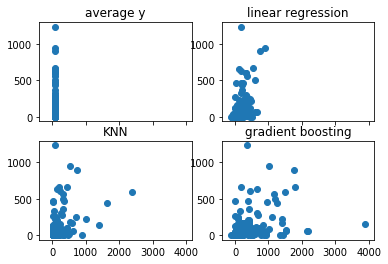

In [31]:
# Draw plots for the different methods. x-axis the predicted values and y-axis the actual values
fig, axes = plt.subplots(2, 2, sharex=True)

mse = [mse_avg, mse_lr, mse_neigh, mse_gb]
mae = [mae_avg, mae_lr, mae_neigh, mae_gb]

titles = ['average y', 'linear regression', 'KNN', 'gradient boosting']
predictions = [y_avg, y_lr, y_neigh, y_gb]

for counter, ax in enumerate(axes.flat):
    ax.scatter(predictions[counter], y_test)
    ax.set_title(titles[counter])

plt.show()

# Another Go at Regression

Again we use a test train split, create our linear regression model and fit tothe data.

In [32]:
y_second = y
X_second = X_new

#Solution: Split
X_train, X_test, y_train, y_test = train_test_split(X_second, y_second, test_size=0.2, random_state=42)

#Solution: Standardise
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


#Solution: Fit
lr_second = LinearRegression()
lr_second.fit(X_train, y_train)
y_lr_second = lr_second.predict(X_test)

#Solution: MSE
mse_lr_second = mean_squared_error(y_test, y_lr_second)

In [33]:
def simple_linear_regression(X, y):
    #Create a vector of ones the same shape as X this will be the bias
    X_b = np.c_[np.ones((X.shape[0], 1)), X] 
    #Theta best found using the normal equation defined above
    theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
    return theta_best

In [34]:
def pred(theta, X_test):    
    #Solution: Take in thesta_best(bias term) and apply to a model
    y_pred = theta[0]+np.dot(X_test,theta[1:])
    return y_pred

In [35]:
#Solution
theta_second = simple_linear_regression(X_train, y_train)
ypred_second = pred(theta_second,X_test)
mse_ypred_second = mean_squared_error(y_test, ypred_second)